In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split
from IPython.display import HTML, display
from tabulate import tabulate
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
scaler = StandardScaler()
import seaborn as sns
from sklearn.feature_selection import SelectKBest, mutual_info_classif



In [10]:
orig_df = pd.read_csv('../data/ED_2008-17_with_MC_female.csv') 

/home/bwhite48/.venv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (7,16,18,19,22,23,24,25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
POSSIBLE_RELEVANT_COLS_5 = ['Encounter_Type', 'Age_Group_Num', 'Age_Group',
       'Patient_Gender', 'Admission_Type', 'ER_Flag',
       'Observation_Stay_Flag', 'Admission_Year', 'Admission_Quarter',
       'Admission_Hour', 'LOS_Days', 'LOS_Hours',
       'pop', 'pctgqtract', 'LEB', 'hpi', 'economic',
       'education', 'insurance', 'clean_enviro', 'housing', 'neighborhood',
       'social', 'transportation', 'abovepoverty', 'automobile', 'bachelorsed',
       'bikeaccess', 'censusresponse', 'dieselpm', 'employed', 'homeownership',
       'houserepair', 'inhighschool', 'inpreschool', 'insured', 'ownsevere',
       'parkaccess_ut', 'percapitaincome', 'pm25', 'rentsevere', 'treecanopy',
       'uncrowded', 'voting', 'latino_pct', 'white_pct', 'black_pct',
       'asian_pct', 'multiple_pct', 'NativeAm_pct', 'PacificIsl_pct',
       'other_pct', 'Maternal_Complications_Indicator']

def filter_df(df, columns_to_keep):
    columns_to_drop = [col for col in df.columns if col not in columns_to_keep]
    df.drop(columns=columns_to_drop, inplace=True)
    df.dropna(axis=0, inplace=True)
    return df

In [ ]:
df = filter_df(orig_df, POSSIBLE_RELEVANT_COLS_5)
df

In [ ]:
zeros_subset = df[df['Maternal_Complications_Indicator'] == 0]
ones_subset = df[df['Maternal_Complications_Indicator'] == 1]
print(len(zeros_subset))
print(len(ones_subset))
# Calculate the desired number of samples for each label
num_samples_zeros = int(len(zeros_subset) / 10)  
num_samples_ones = int(len(ones_subset) / 10)
# Assuming you want an even number of samples for each label
print(num_samples_zeros)
print(num_samples_ones)
# Randomly select the desired number of samples from each subset
random_zeros = zeros_subset.sample(n=num_samples_zeros, random_state=42)  # You can change the random_state for reproducibility
random_ones = ones_subset.sample(n=num_samples_ones, random_state=42)

# Combine the randomly selected samples
df_small = pd.concat([random_zeros, random_ones])
print(len(df_small))

In [14]:
X_unprocessed = df_small.drop(columns=['Maternal_Complications_Indicator'])
y = df_small['Maternal_Complications_Indicator']

categorical_feats = []
for col in X_unprocessed.columns:
    if X_unprocessed[col].dtype == 'object':
        categorical_feats.append(col)
        
X = pd.get_dummies(X_unprocessed, columns=categorical_feats, drop_first=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(len(X_train))
print(y_train.value_counts())
print(y_test.value_counts())
print(len(X_test))

In [ ]:

headers = ["Number neighbors",	"Training Accuracy",	"Test Accuracy"]
table = []

for i in tqdm(range(3,7)):
  #create classifier
  knn_classifier = KNeighborsClassifier(n_neighbors=i)
  #train
  knn_classifier.fit(X_train, y_train)

  # training prediction accuracy
  y_train_pred = knn_classifier.predict(X_train)
  train_accuracy = accuracy_score(y_train, y_train_pred)
  # test prediction accuracy
  y_test_pred = knn_classifier.predict(X_test)
  test_accuracy = accuracy_score(y_test, y_test_pred)

  table.append([i, train_accuracy, test_accuracy])


#display(HTML(tabulate(table, headers=headers, tablefmt='html')))
sorted_table = sorted(table, key=lambda x: x[2], reverse=True)
display(HTML(tabulate(sorted_table, headers=headers, tablefmt='html')))
best_n_neighbors = sorted_table[0][0]

In [ ]:
#weights
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

headers = ["Weights",	"Training Accuracy",	"Test Accuracy"]
table = []
weights = ['uniform', 'distance']

for weight in tqdm(weights):
  #create classifier
  knn_classifier = KNeighborsClassifier(n_neighbors=best_n_neighbors, weights = weight)
  #train
  knn_classifier.fit(X_train, y_train)

  # training prediction accuracy
  y_train_pred = knn_classifier.predict(X_train)
  train_accuracy = accuracy_score(y_train, y_train_pred)
  # test prediction accuracy
  y_test_pred = knn_classifier.predict(X_test)
  test_accuracy = accuracy_score(y_test, y_test_pred)

  table.append([weight, train_accuracy, test_accuracy])


#display(HTML(tabulate(table, headers=headers, tablefmt='html')))
sorted_table = sorted(table, key=lambda x: x[2], reverse=True)
display(HTML(tabulate(sorted_table, headers=headers, tablefmt='html')))
best_weights = sorted_table[0][0]


  0%|          | 0/2 [00:00<?, ?it/s]

100%|██████████| 2/2 [01:55<00:00, 57.77s/it]


Weights,Training Accuracy,Test Accuracy
uniform,0.833133,0.766322
distance,0.930883,0.741291


In [ ]:
#algorithm
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

headers = ["Algorithm",	"Training Accuracy",	"Test Accuracy"]
table = []
algors = ['auto', 'ball_tree', 'kd_tree', 'brute']

for algor in tqdm(algors):
  #create classifier
  knn_classifier = KNeighborsClassifier(n_neighbors=best_n_neighbors, weights = best_weights,
                                        algorithm = algor)
  #train
  knn_classifier.fit(X_train, y_train)

  # training prediction accuracy
  y_train_pred = knn_classifier.predict(X_train)
  train_accuracy = accuracy_score(y_train, y_train_pred)
  # test prediction accuracy
  y_test_pred = knn_classifier.predict(X_test)
  test_accuracy = accuracy_score(y_test, y_test_pred)

  table.append([algor, train_accuracy, test_accuracy])


#display(HTML(tabulate(table, headers=headers, tablefmt='html')))
sorted_table = sorted(table, key=lambda x: x[2], reverse=True)
display(HTML(tabulate(sorted_table, headers=headers, tablefmt='html')))
best_algorithm = sorted_table[0][0]


  0%|          | 0/4 [00:00<?, ?it/s]

100%|██████████| 4/4 [02:07<00:00, 31.76s/it]


Algorithm,Training Accuracy,Test Accuracy
auto,0.833133,0.766322
brute,0.833133,0.766322
ball_tree,0.832063,0.761449
kd_tree,0.833133,0.760171


In [ ]:
#leaf_size (only if best_algor ≠ 'brute')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

headers = ["leaf_size",	"Training Accuracy",	"Test Accuracy"]
table = []
sizes = [1, 2, 5, 10, 30]

for size in tqdm(sizes):
  #create classifier
  knn_classifier = KNeighborsClassifier(n_neighbors=best_n_neighbors, weights = best_weights,
                                        algorithm = best_algorithm, leaf_size = size)
  #train
  knn_classifier.fit(X_train, y_train)

  # training prediction accuracy
  y_train_pred = knn_classifier.predict(X_train)
  train_accuracy = accuracy_score(y_train, y_train_pred)
  # test prediction accuracy
  y_test_pred = knn_classifier.predict(X_test)
  test_accuracy = accuracy_score(y_test, y_test_pred)

  table.append([size, train_accuracy, test_accuracy])


#display(HTML(tabulate(table, headers=headers, tablefmt='html')))
sorted_table = sorted(table, key=lambda x: x[2], reverse=True)
display(HTML(tabulate(sorted_table, headers=headers, tablefmt='html')))
best_leaf_size = sorted_table[0][0]

  0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 5/5 [04:50<00:00, 58.10s/it]


leaf_size,Training Accuracy,Test Accuracy
1,0.833133,0.766322
2,0.833133,0.766322
5,0.833133,0.766322
10,0.833133,0.766322
30,0.833133,0.766322


In [ ]:
#p

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

headers = ["p_val",	"Training Accuracy",	"Test Accuracy"]
table = []
p_vals = [1, 2]

for p_val in tqdm(p_vals):
  #create classifier
  knn_classifier = KNeighborsClassifier(n_neighbors=5, weights = "uniform",
                                        algorithm = "auto", leaf_size = 1,
                                        p = p_val)
  #train
  knn_classifier.fit(X_train, y_train)

  # training prediction accuracy
  y_train_pred = knn_classifier.predict(X_train)
  train_accuracy = accuracy_score(y_train, y_train_pred)
  # test prediction accuracy
  y_test_pred = knn_classifier.predict(X_test)
  test_accuracy = accuracy_score(y_test, y_test_pred)

  table.append([p_val, train_accuracy, test_accuracy])


#display(HTML(tabulate(table, headers=headers, tablefmt='html')))
sorted_table = sorted(table, key=lambda x: x[2], reverse=True)
display(HTML(tabulate(sorted_table, headers=headers, tablefmt='html')))
best_p = sorted_table[0][0]


  0%|          | 0/2 [00:00<?, ?it/s]

100%|██████████| 2/2 [02:16<00:00, 68.38s/it]


p_val,Training Accuracy,Test Accuracy
2,0.833133,0.766322
1,0.833159,0.762911


In [ ]:
#metric

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

headers = ["metric",	"Training Accuracy",	"Test Accuracy"]
table = []
metrics = ['cityblock', 'euclidean', 'l1', 'l2', 'manhattan'] #, mydist]
# no 'haversine' because only works if 2-d


for cur_met in tqdm(metrics):
  #create classifier
  knn_classifier = KNeighborsClassifier(n_neighbors=best_n_neighbors, weights = best_weights,
                                        algorithm = best_algorithm, leaf_size = best_leaf_size,
                                        p = best_p, metric = cur_met)
  #train
  knn_classifier.fit(X_train, y_train)

  # training prediction accuracy
  y_train_pred = knn_classifier.predict(X_train)
  train_accuracy = accuracy_score(y_train, y_train_pred)
  # test prediction accuracy
  y_test_pred = knn_classifier.predict(X_test)
  test_accuracy = accuracy_score(y_test, y_test_pred)

  table.append([cur_met, train_accuracy, test_accuracy])

sorted_table = sorted(table, key=lambda x: x[2], reverse=True)
display(HTML(tabulate(sorted_table, headers=headers, tablefmt='html')))
best_metric = sorted_table[0][0]


  0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 5/5 [06:11<00:00, 74.27s/it]


metric,Training Accuracy,Test Accuracy
euclidean,0.833133,0.766322
l2,0.833133,0.766322
cityblock,0.833159,0.762911
l1,0.833159,0.762911
manhattan,0.833159,0.762911


In [22]:
best_metric = 'euclidean'
best_algorithm = 'auto'
best_leaf_size = 1
best_n_neighbors = 5
best_p = 2
best_weights = 'uniform'

In [35]:
def train(X, y, feature_selection=False, scaled=False, grid_search=False):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    indices_to_drop = y_train[y_train == 0].index

    num_positive_samples = (y_train == 1).sum()
    num_to_drop = len(indices_to_drop) - num_positive_samples
    indices_to_drop = indices_to_drop.to_series().sample(n=num_to_drop, random_state=42)
    # Drop the selected rows
    y_train = y_train.drop(indices_to_drop)
    X_train = X_train.drop(indices_to_drop)
    
    indices_to_drop_acc = y_test[y_test == 0].index
    indices_to_drop_acc = indices_to_drop_acc.to_series().sample(n=len(indices_to_drop_acc) - (y_test == 1).sum(), random_state=42)
    X_test_acc = X_test.drop(indices_to_drop_acc)
    y_test_acc = y_test.drop(indices_to_drop_acc)

    if scaled:
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        X_test_acc = scaler.transform(X_test_acc)
    
    if feature_selection:
        selector = SelectKBest(score_func=mutual_info_classif, k=15) 
        X_train = selector.fit_transform(X_train, y_train)
        X_test = selector.transform(X_test)
        X_test_acc = selector.transform(X_test_acc)
        
    if grid_search:
        knn_classifier = KNeighborsClassifier(n_neighbors=best_n_neighbors, weights = best_weights,
                                        algorithm = best_algorithm, leaf_size = best_leaf_size,
                                        p = best_p, metric = best_metric)
    else:
        knn_classifier = KNeighborsClassifier()
        
    knn_classifier.fit(X_train, y_train)
    
    # training prediction accuracy
    y_train_pred = knn_classifier.predict(X_train)
    
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)

    # test prediction accuracy
    y_test_pred = knn_classifier.predict(X_test)
    y_test_pred_acc = knn_classifier.predict(X_test_acc)
    
    test_accuracy = accuracy_score(y_test_acc, y_test_pred_acc)
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    
    conf_matrix = confusion_matrix(y_test, y_test_pred)

    
    return train_accuracy, test_accuracy, train_precision, test_precision, train_recall, test_recall, conf_matrix

In [36]:
accuracies_df = pd.DataFrame(columns=['Iteration', 'Accuracy', 'Precision', 'Recall'])

train_accuracy, test_accuracy, train_precision, test_precision, train_recall, test_recall, conf_matrix = train(X, y)
new_row = {'Iteration': "All Features", 'Accuracy': test_accuracy, 'Precision': test_precision, 'Recall': test_recall}
accuracies_df = accuracies_df.append(new_row, ignore_index=True)

In [37]:
train_accuracy, test_accuracy, train_precision, test_precision, train_recall, test_recall, conf_matrix = train(X, y, scaled=True)
new_row = {'Iteration': "Scaled", 'Accuracy': test_accuracy, 'Precision': test_precision, 'Recall': test_recall}
accuracies_df = accuracies_df.append(new_row, ignore_index=True)

In [38]:
train_accuracy, test_accuracy, train_precision, test_precision, train_recall, test_recall, conf_matrix = train(X, y, scaled=True, grid_search=True)
new_row = {'Iteration': "Grid Search", 'Accuracy': test_accuracy, 'Precision': test_precision, 'Recall': test_recall}
accuracies_df = accuracies_df.append(new_row, ignore_index=True)

In [39]:
train_accuracy, test_accuracy, train_precision, test_precision, train_recall, test_recall, conf_matrix = train(X, y, feature_selection=True, scaled=True, grid_search=True)
new_row = {'Iteration': "Feature Selection", 'Accuracy': test_accuracy, 'Precision': test_precision, 'Recall': test_recall}
accuracies_df = accuracies_df.append(new_row, ignore_index=True)

In [40]:
accuracies_df

,Iteration,Accuracy,Precision,Recall
0,All Features,0.759210,0.117627,0.819680
1,Scaled,0.763936,0.117909,0.826709
2,Grid Search,0.763936,0.117909,0.826709
3,Feature Selection,0.756059,0.122371,0.802230


In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=best_n_neighbors, weights = best_weights,
                                    algorithm = best_algorithm, leaf_size = best_leaf_size,
                                    p = best_p, metric = cur_met)
#train
knn_classifier.fit(X_train, y_train)

# training prediction accuracy
y_train_pred = knn_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)

# test prediction accuracy
y_test_pred = knn_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)

print("Train accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)
print()
print("Train recall:", train_recall)
print("Test recall:", test_recall)
print()
print("Train precision:", train_precision)
print("Test precision:", test_precision)

Train accuracy: 0.8331593234495719
Test accuracy: 0.762911084043849

Train recall: 0.8963105985492877
Test recall: 0.8211629891503108

Train precision: 0.7958852694499792
Test precision: 0.7352106526959179


In [ ]:
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[5791 2426]
 [1467 6736]]


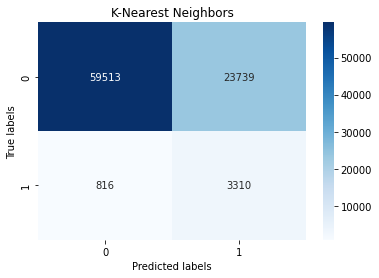

In [42]:

# Create a heatmap of the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('K-Nearest Neighbors')
plt.show()